<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'

In [3]:
data = pd.read_csv('../../Data/breast-cancer-wisconsin-data.csv', index_col=0)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. EDA 

Explore dataset. Clean data. Find correlation. 
Things like:
* Data type
* Null values, how to deal
* Outliers
* Any columns not required
* Feature selection
* How clean is this data set?
* Possible features I can use to solve this problem?
* Domain knowledge, what are the features that different tumors
* Identify possible target
* Figure out any relationships between features
* Distribution of the data

In [4]:
print(data.dtypes)
print(data.shape)

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [5]:
data.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [7]:
data = data.drop(['Unnamed: 32'], axis = 1) # axix=1 tels us to just drop the column and not the row

KeyError: "['Unnamed: 32'] not found in axis"

In [8]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# Transform diagnosis to binary

In [10]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [11]:
data['diagnosis'] = data['diagnosis'].replace({'B':0, 'M':1}).astype(float)

In [12]:
data.dtypes

diagnosis                  float64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

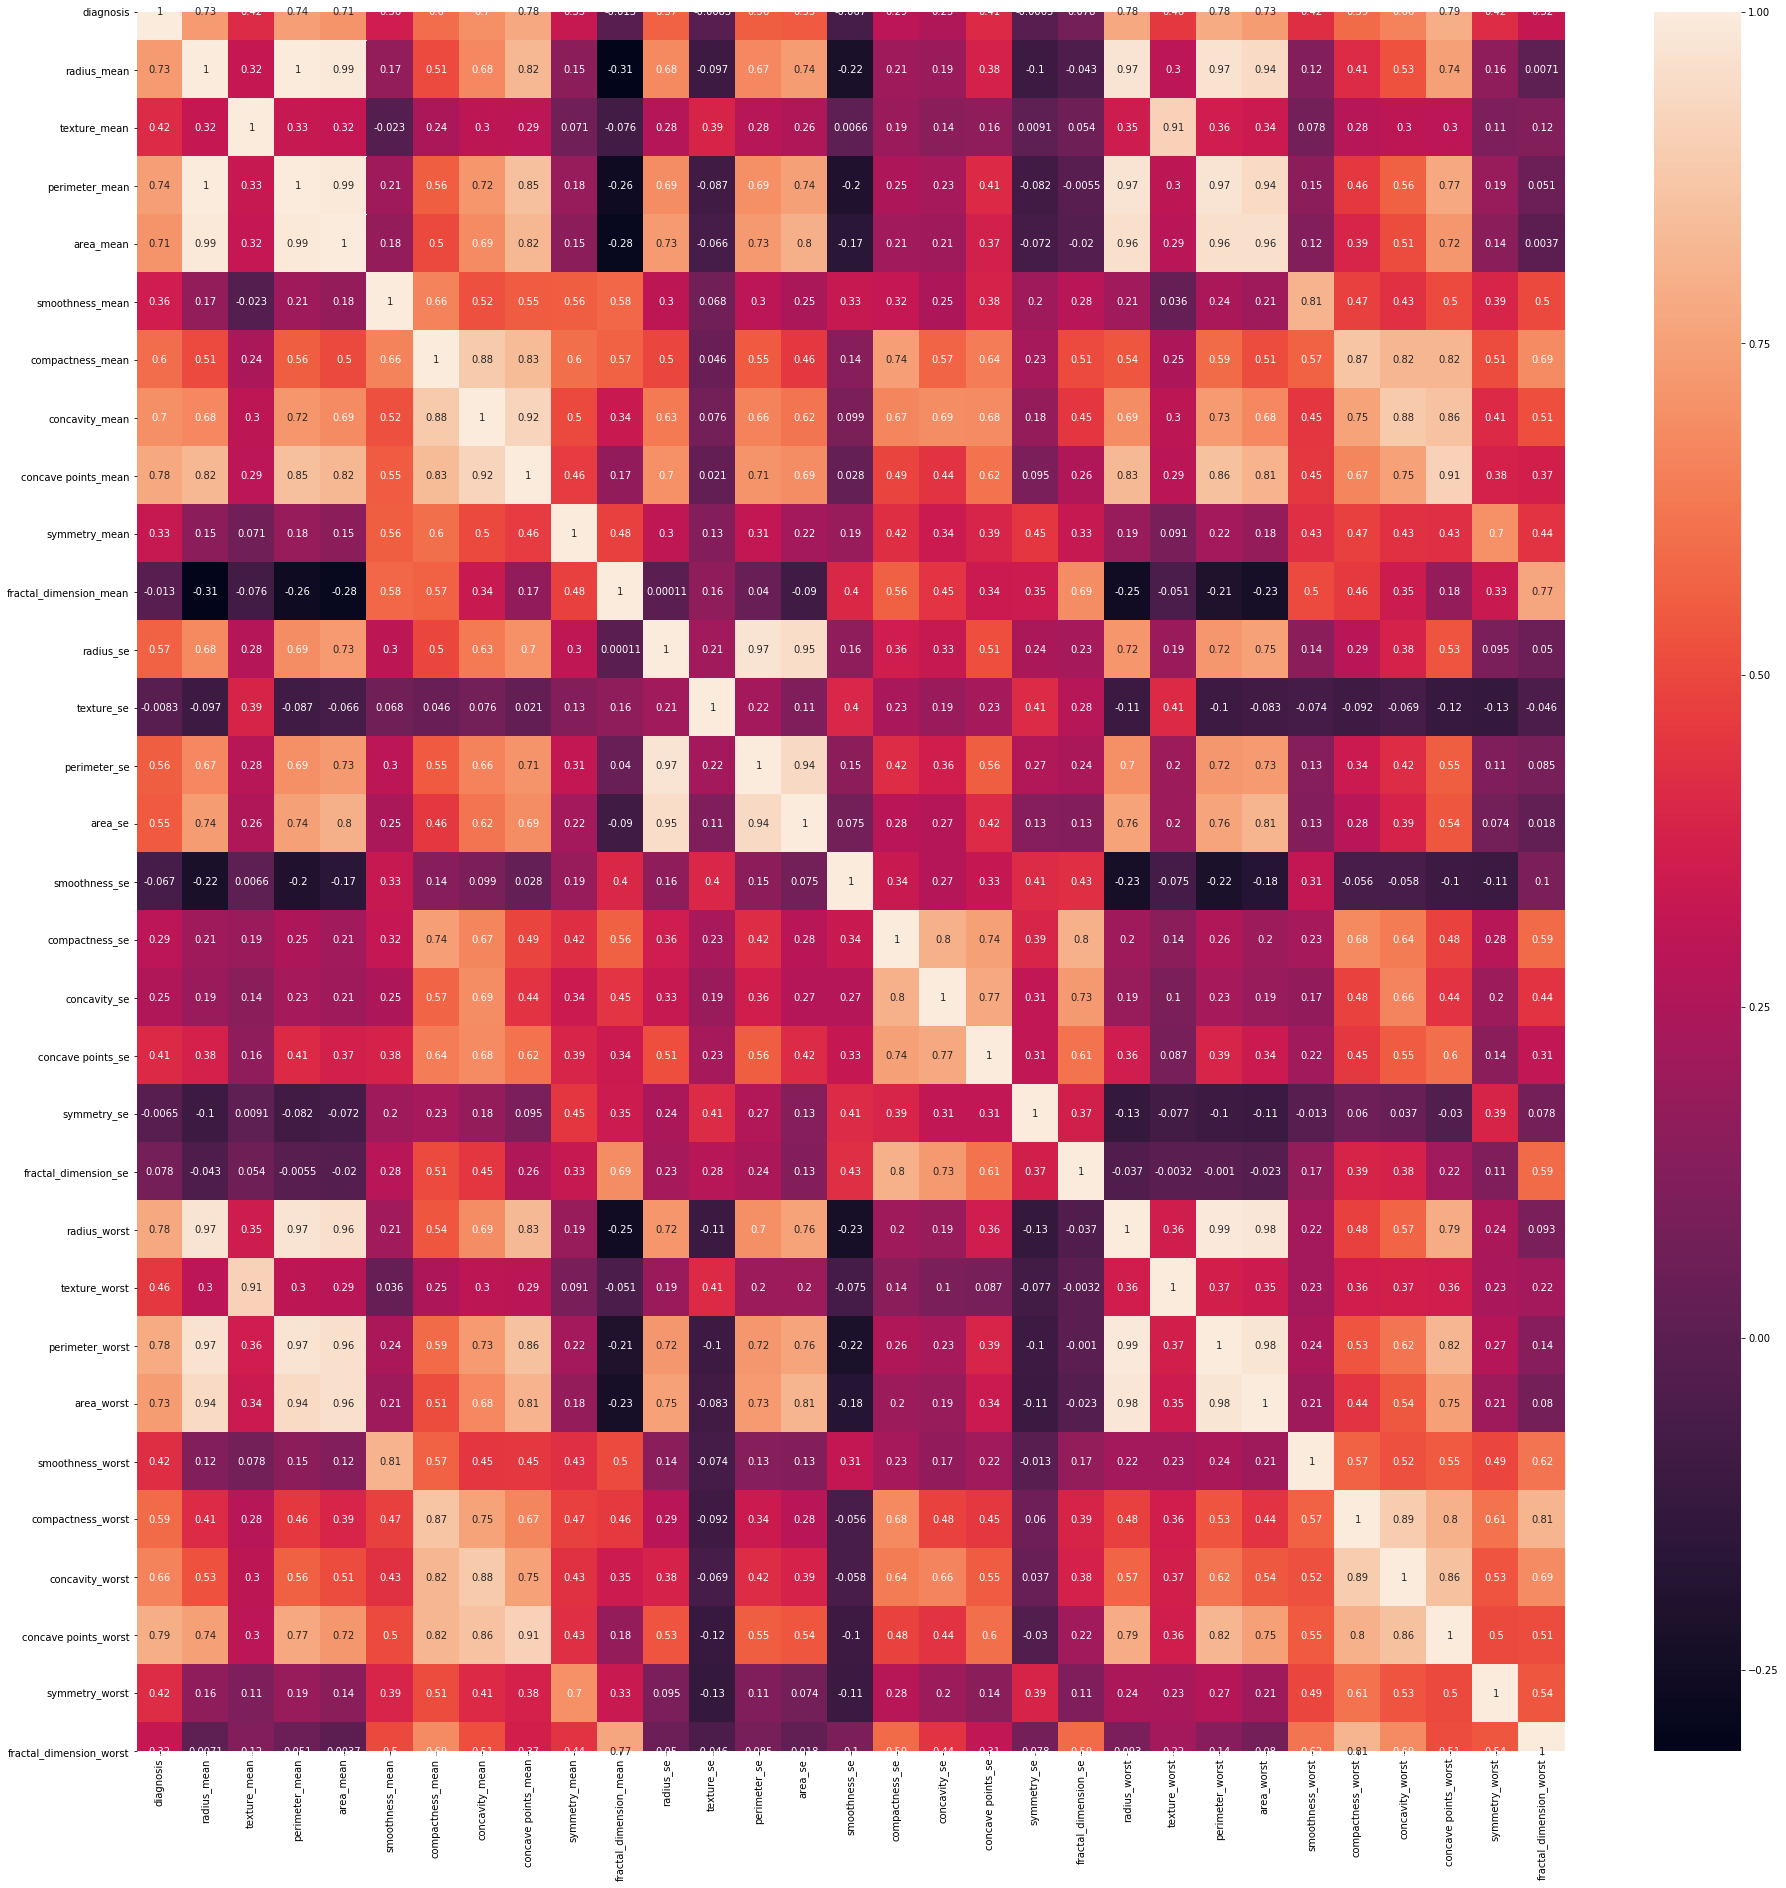

In [13]:
# Get heatmap
plt.figure(figsize=(32,32))
sns.heatmap(data.corr(), annot=True)
plt.show()

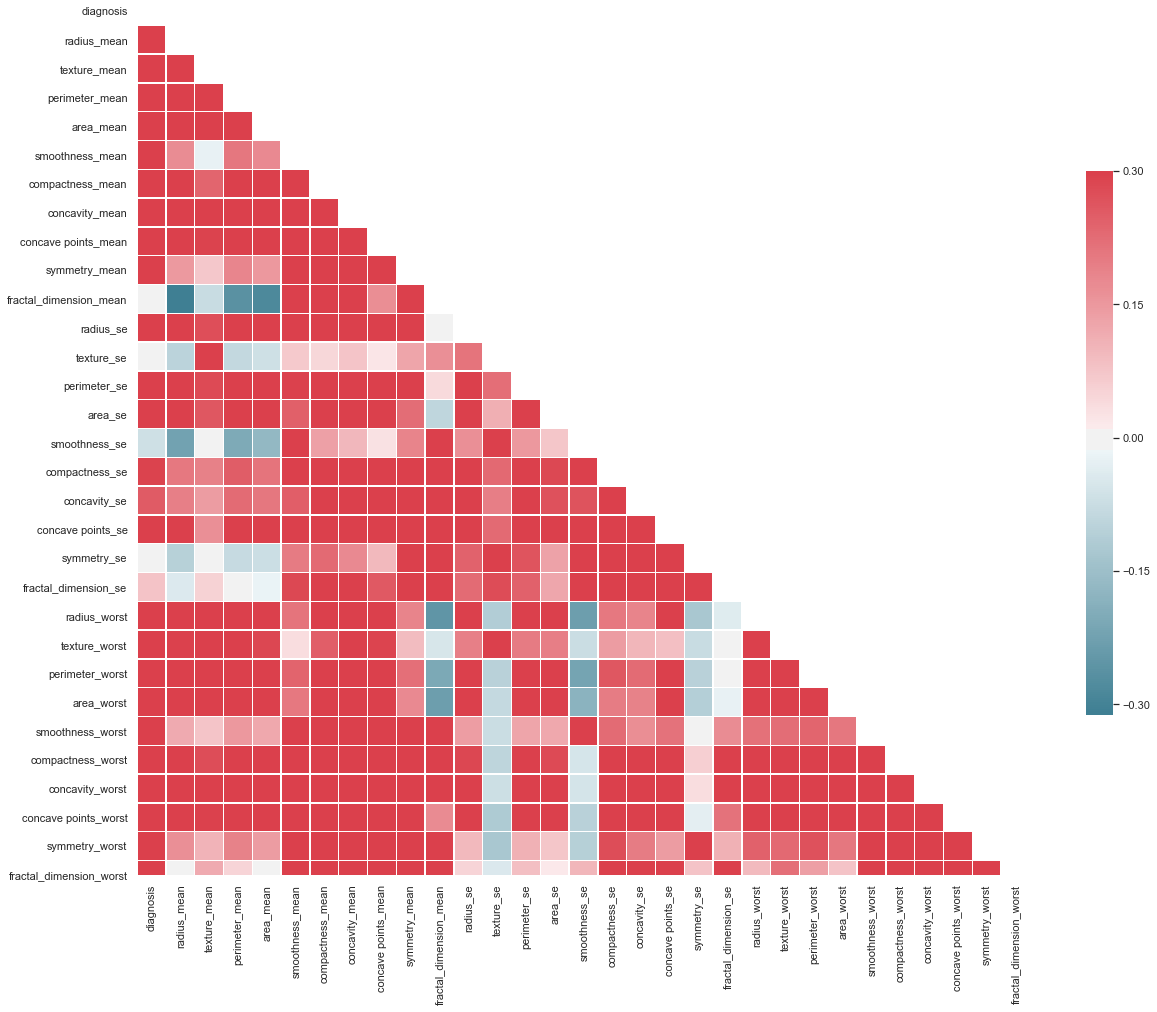

In [31]:
# From Seaborn documentation
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

from string import ascii_letters
sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
# Find % of diagnosis
(data['diagnosis'].value_counts(normalize=True))

0.0    0.627417
1.0    0.372583
Name: diagnosis, dtype: float64

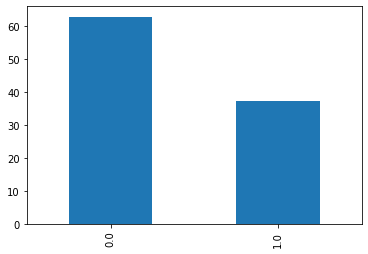

In [20]:
# Plot % of diagnosis values
(data['diagnosis'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.show()

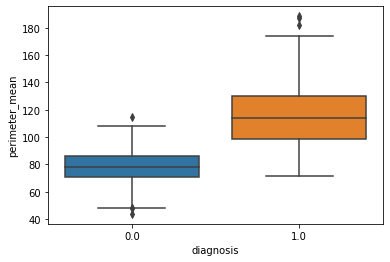

In [23]:
# Compare distribution of values between B and M groups
sns.boxplot(x='diagnosis', y='perimeter_mean', data=data)
plt.show()

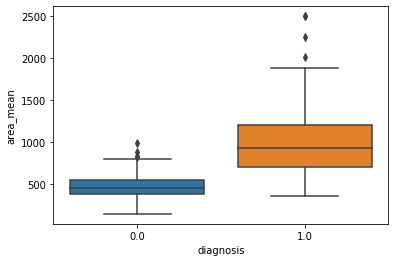

In [24]:
# Compare distribution of values between B and M groups
sns.boxplot(x='diagnosis', y='area_mean', data=data)
plt.show()

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [32]:
# ANSWER
# It's a classificiation problem so how many classifications are there

In [33]:
# There are 2 classes

### 4. What is the baseline accuracy?

In [15]:
# ANSWER
# What's the baseline percentage of malignant vs benign tumors
# Same as zero information (using the mean)
data['diagnosis'].value_counts()

0.0    357
1.0    212
Name: diagnosis, dtype: int64

In [45]:
y.value_counts(normalize=True)

0.0    0.627417
1.0    0.372583
Name: diagnosis, dtype: float64

In [16]:
# Baseline accuracy is that 63% chance the next prediction is benign

### 5. Choose features to be your predictor variables and set up your X.

In [46]:
data['diagnosis'].corr

<bound method Series.corr of id
842302      1.0
842517      1.0
84300903    1.0
84348301    1.0
84358402    1.0
           ... 
926424      1.0
926682      1.0
926954      1.0
927241      1.0
92751       0.0
Name: diagnosis, Length: 569, dtype: float64>

In [47]:
# ANSWER
# Check correlation, which columns are not necessary
cor = data.corr()
cor_target = cor['diagnosis']
relevant_features = cor_target[cor_target>0.5].sort_values(ascending=False)
relevant_features

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
Name: diagnosis, dtype: float64

In [48]:
mean_only_columns = []

for column in data.columns:
    if '_mean' in column in column:
        mean_only_columns.append(column)
        
print(mean_only_columns)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [49]:
# Consider using mean only columns because the 'worst' features might be too highly correlated, which risks overfitting

X = data[mean_only_columns]
y = data['diagnosis']
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648


In [50]:
# Create a custom function that plots correlation in heatmap

def plot_corr_heatmap():
    
    # Compute the correlation matrix
    sns.set(style='white')
    
    corr = mean_only_columns.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(df.corr(),dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 20))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df.corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
plot_corr_heatmap(mean_only_columns)

TypeError: plot_corr_heatmap() takes 0 positional arguments but 1 was given

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [51]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
# Don't do test train split yet

# fit on the unstandardized data:

In [67]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [64]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [72]:
print(knn.score(X,y))

0.9666080843585237


### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [73]:
# It is way better than the baseline but it is not legitimate because there is only one neighbor which means it has a 100% prediction

In [74]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values (store it in a variable so you can keep using it)

In [75]:
pred = knn.predict(X)
pred

array([1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0.

In [76]:
print(metrics.accuracy_score(y, pred))

0.9666080843585237


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [93]:
# ANSWER
# Repeating the above 
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
pred2 = knn.predict(X_test)
print(metrics.accuracy_score(y_test, pred2))

0.8321678321678322


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [94]:
len(y_train)

426

In [96]:
X_train.shape

(426, 10)

In [100]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
knn = KNeighborsClassifier(n_neighbors=len(y_train))

# Fit Train Data
knn.fit(X_train, y_train)

# Print accuracy_score
pred3 = knn.predict(X_test)
print(metrics.accuracy_score(y_test, pred3))

0.5594405594405595


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [41]:
# Similar to 6.1.1 elbow plot

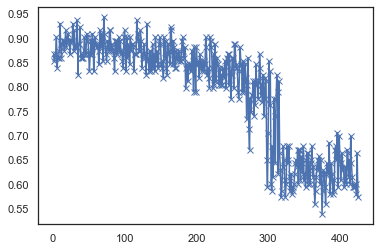

In [101]:
# ANSWER
# plot test accuracy by number of neighbors:

def length(X, y):
    list = []
    for n in range (1, 426):
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        knn = KNeighborsClassifier(n_neighbors=(n))
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        list.append(metrics.accuracy_score(y_test, pred))
    return list

accuracy = length(X, y)
K = range(1, 426)

plt.plot(K, accuracy, 'bx-')
plt.show()

In [109]:
test_acc =[]

for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))


In [110]:
print(knn.fit(X_train, y_train))

KNeighborsClassifier()


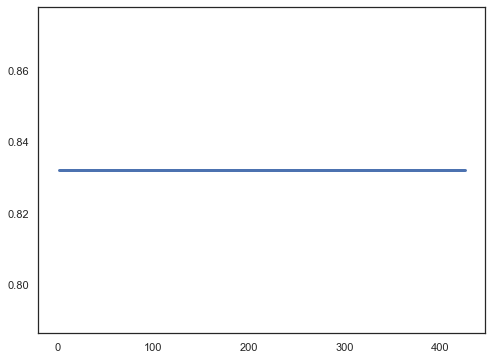

In [111]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw=3.)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [43]:
# ANSWER
# The entire datasets is being divided into 5 different parts. Train on 4 parts, test on the 5th part.
# Then find the accuracy of the 5th 
# At the end you'll have 5 accuracy scores, then find the mean of those scores

In [114]:
from sklearn.model_selection import cross_val_score

# Create list of K for KNN
neighbors = list(range(1, 300))

# Empty list that will hold cross validation scores
cv_scores = []

# Perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
print(scores.mean())

0.6502325581395348


In [115]:
# Changing to misclassification error
mse = [1 - x for x in cv_scores]

# Determine the best k
optimal_k = neighbors[mse.index(min(mse))]
print("Optimal k is {}".format(optimal_k))

Optimal k is 17


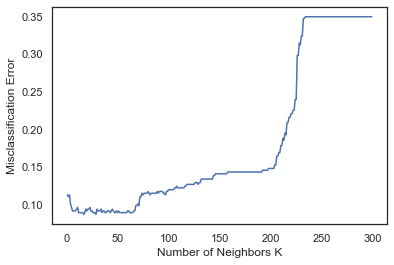

In [116]:
# Plot misclassification error
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [48]:
# What's the difference between one that is standardized (using standard scale method)

In [97]:
# ANSWER
# Standarize X
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
X_scaled

array([[ 2.29607613,  2.30360062,  2.53247522,  1.88668963,  1.26993369],
       [ 1.0870843 ,  1.53512599,  0.54814416,  1.80592744,  1.68595471],
       [ 1.95500035,  1.34747521,  2.03723076,  1.51187025,  1.56650313],
       ...,
       [ 0.41406869,  0.57900058,  0.10577736,  0.56136143,  0.67267578],
       [ 2.28998549,  2.30360062,  2.65886573,  1.96123934,  1.98252415],
       [-1.74506282, -1.43273495, -1.26181958, -1.41089258, -1.81438851]])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)
knn = KNeighborsClassifier(n_neighbors=len(y_train))
knn.fit(X_train, y_train)
pred3 = knn.predict(X_test)
print(metrics.accuracy_score(y_test, pred3))

0.6853146853146853


In [89]:
# ANSWER
# plot test accuracy by number of neighbors:

# Create list of K for KNN
neighbors = list(range(1, 300))

# Empty list that will hold cross validation scores
cv_scores_scaled = []

# Perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores_scaled.append(scores.mean())
    
print(scores.mean())

0.6079949188977917


In [90]:
# Changing to misclassification error
mse2 = [1 - x for x in cv_scores_scaled]

# Determine the best k
optimal_k = neighbors[mse2.index(min(mse2))]
print("Optimal k is {}".format(optimal_k))

Optimal k is 7


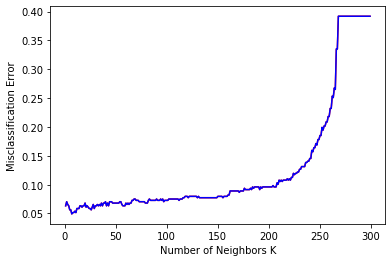

In [91]:
plt.plot(neighbors, mse, 'r')
plt.plot(neighbors, mse2, 'b')
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



